In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
lines = open("shakespeare.txt").read().splitlines()
chars = []

# Get dataset made of words from first 1000 lines of shakespeare
for line in lines[:100000]:
    splitline = list(line.split(" ")) # introduce special '£' character for linebreak
    words = ['+' + word + '+' for word in splitline if word != ''] + ["£"] # introduce '+' character for space
    for word in words:
        chars += ([char for char in word])

In [3]:
vocabulary = sorted(set(chars))
stoi = {s:i for i, s in enumerate(vocabulary)}
itos = {i:s for s, i in stoi.items()}

N = torch.zeros((len(vocabulary), len(vocabulary))) # Matrix encoding likelihood of 

In [4]:
for word1, word2 in zip(chars, chars[1:]):
    ix1 = stoi[word1]
    ix2 = stoi[word2]
    N[ix1][ix2] += 1

# Smoothing
N += torch.ones_like(N)/10

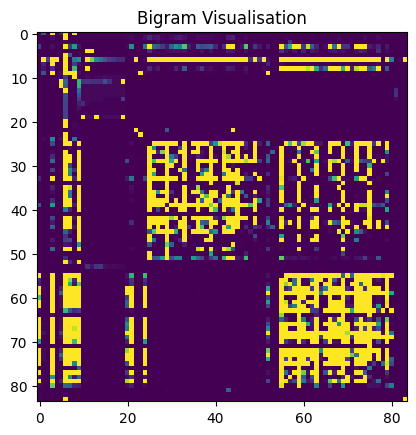

In [5]:
plt.imshow(N, vmax=100)
plt.title("Bigram Visualisation")
plt.show()

In [6]:
# Turn each row into a probability distribution
probs = N / N.sum(1, keepdim=True)

generator = torch.Generator().manual_seed(42)
generated_lines = []

i = 0
lines_to_gen = 200

ix = torch.tensor([0])
for i in range(lines_to_gen):
    new_line = False
    line = []
    while not new_line:
        ix = torch.multinomial(probs[ix.item()], generator=generator, num_samples=1)
        
        if ix.item() == stoi["+"]:
            next_word = ' '
            line.append(next_word)
        elif ix.item() == stoi["£"]:
            i = i + 1
            generated_lines.append(line)
            new_line = True
        else:
            next_word = itos[ix.item()]
            line.append(next_word)
            
for line in generated_lines:
    full_line = ''.join(letter for letter in line)
    print(full_line)


'dedofflllll   Lirisery pr  vemeliad   topr  sh it avale GUS t th'sit. g DOHEMERI  thebeg mos  l    

 througstheo. 
  wimiandinos Can  fthe 

 gis 
 thed th 
      t   chast.  otheldn-f inthe ARMADI tarayofon an    bichelsprtstspr sente in,  OY. no 
 thte-f    is sen ad a 
 the  yomeee,  an'stot!  L. he'd whr; 

 stotay  d  th  athonnd RA'lewlf   Hery 
 rry   to fe? m 
 y   SSt nonthe,   nseracee  wasurs,  UFF  beyoulet? ACEncebyee ot t n my    LUSA wherk  VIINothimin sesit      fo  set   F    iof 
 d  lat thant d, wa MENOLLARIR couthoad   f  Falous    e 
  d    Wh  
 vesure  at; llyom   Whe rit ARSpreratl THo thiet? Mithlk  ANI's en? rro  N theyin, 
  p aimalithes dithon   
  
   Noronoryo wisth I   
  aigowis  pry 
 bin   lelyen  t th   m  bufffan  
 thiclaw TONE  I      Ths    ARGOThefen'the youll r The.   lf 
 
  or   t    (2)    
 assicofinaret      e PHAnt 
 ad, wo fomem knstherveame  ffee Y   whou   aico d  rn NIMULeat?   I ce ty okn  JEN Mas ard, Ithand onnour       eat maroup